<a href="https://colab.research.google.com/github/Son-Of-Fry/ProyectoIntegrador/blob/main/Avance2_64Equipo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Parte 2: Ingeniería de Características y Primer Diseño

Por José Ricardo Munguía Marín


En esta fase del proyecto se aplicó una ligera ingeniería de características al dataset COCO para facilitar el análisis y entrenamiento de modelos, principalmente YOLO.

**Parte A – Extracción de características:**

principales features:

- **`width`**: ancho de la caja delimitadora del objeto (en píxeles).
- **`height`**: alto de la caja delimitadora del objeto.
- **`area`**: superficie del objeto, calculada como `width × height`.
- **`aspect_ratio`**: proporción entre ancho y alto (`width / height`), indica si el objeto es más ancho o más alto.
- **`center_x`**: coordenada horizontal del centro de la caja (posición del objeto en la imagen).
- **`center_y`**: coordenada vertical del centro de la caja.
- **`category_id`**: identificador numérico de la clase del objeto.


In [12]:
# --- Ingeniería de características (Parte A) ---
features = []
for ann in anns:
  x, y, w, h = ann['bbox']
  area = w * h
  aspect_ratio = w / h if h != 0 else 0
  cx = x + w / 2
  cy = y + h / 2
  features.append({
  'width': w,
  'height': h,
  'area': area,
  'aspect_ratio': aspect_ratio,
  'center_x': cx,
  'center_y': cy,
  'category_id': ann['category_id']
  })


features_df = pd.DataFrame(features)
print("Muestra de características extraídas:")
print(features_df.head())


Ejemplo de características extraídas:
    width  height         area  aspect_ratio  center_x  center_y  category_id
0   38.65   28.67    1108.0955      1.348099   492.395   410.265           18
1  151.97  279.77   42516.6469      0.543196   348.085   340.115           18
2  372.85  356.81  133036.6085      1.044954   311.135   374.585           18
3  367.29  479.35  176060.4615      0.766225   296.355   394.495           18
4  400.22  251.02  100463.2244      1.594375   400.720   215.160           18


In [15]:
features_df.describe()

,width,height,area,aspect_ratio,center_x,center_y,category_id
count,36781.000000,36781.000000,36781.000000,36781.000000,36781.000000,36781.000000,36781.000000
mean,102.952887,107.277140,21306.906710,1.202127,295.515618,247.267823,29.914847
std,125.671541,114.799171,45412.292354,1.300122,157.076266,111.856530,28.551477
min,1.180000,0.860000,2.513400,0.045412,1.960000,3.385000,1.000000
25%,23.420000,27.970000,682.312000,0.517341,174.380000,171.710000,1.000000
50%,53.710000,62.250000,3280.954600,0.860136,289.890000,239.680000,22.000000
75%,128.170000,143.990000,17241.573200,1.405421,409.710000,316.015000,55.000000
max,640.000000,640.000000,409094.400000,46.698589,638.105000,633.235000,90.000000


## KPIs principales.

width ≈ 103, height ≈ 107: en promedio, los objetos anotados son de tamaño pequeño, pues ocupan menos del cuarto del ancho/alto (siendo fotos 640 px aprox.).

area ≈ 21,307: confirma que la mayoría de los objetos ocupan menos de (640×640 = 409,600).

aspect_ratio ≈ 1.20: los objetos son ligeramente más anchos que altos, en promedio.

center_x ≈ 295, center_y ≈ 247: los objetos están mayormente distribuidos alrededor del centro horizontal (que el centro sería ~320), lo cual sugiere que muchos objetos están en la parte media-baja de la imagen.


In [11]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# --- Selección y reducción de características (Parte B) ---
X = features_df.drop(columns=['category_id'])


# Eliminar características con varianza baja
selector = VarianceThreshold(threshold=0.01)
X_reduced = selector.fit_transform(X)
print("Shape después del umbral de varianza:", X_reduced.shape)


Shape después del umbral de varianza: (36781, 6)


In [4]:
# Normaliza
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced)

# Reducción de dimensión
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print("Shape después de PCA:", X_pca.shape)


Shape después de PCA: (36781, 2)


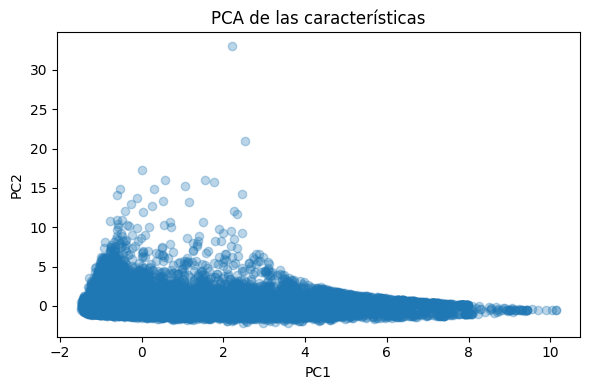

In [5]:
# Visualización basada en el PC1 y PC2 de antes
plt.figure(figsize=(6,4))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.3)
plt.title('PCA de las características')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

Este gráfico confirma que la mayoría de las anotaciones son consistentes entre sí, y unas pocas son significativamente distintas.

**conclusión**

Ya que la mayoría de objetos reales en COCO aparecen así, priorizar este patrón puede ayudar al modelo a enfocarse mejor en regiones como base para el fine-tuning pues esto puede dar mejores resultados ya que son zonas donde los modelos encuentran la mayoría de los objetos.

# Plano del proyecto

avanzando con el proposito del proyecto, que es permitir ejecutar modelso de vision y entrenarlos sin codigos, se muestra la siguient interfaz como punto de partida para iniciar su desarrollo.


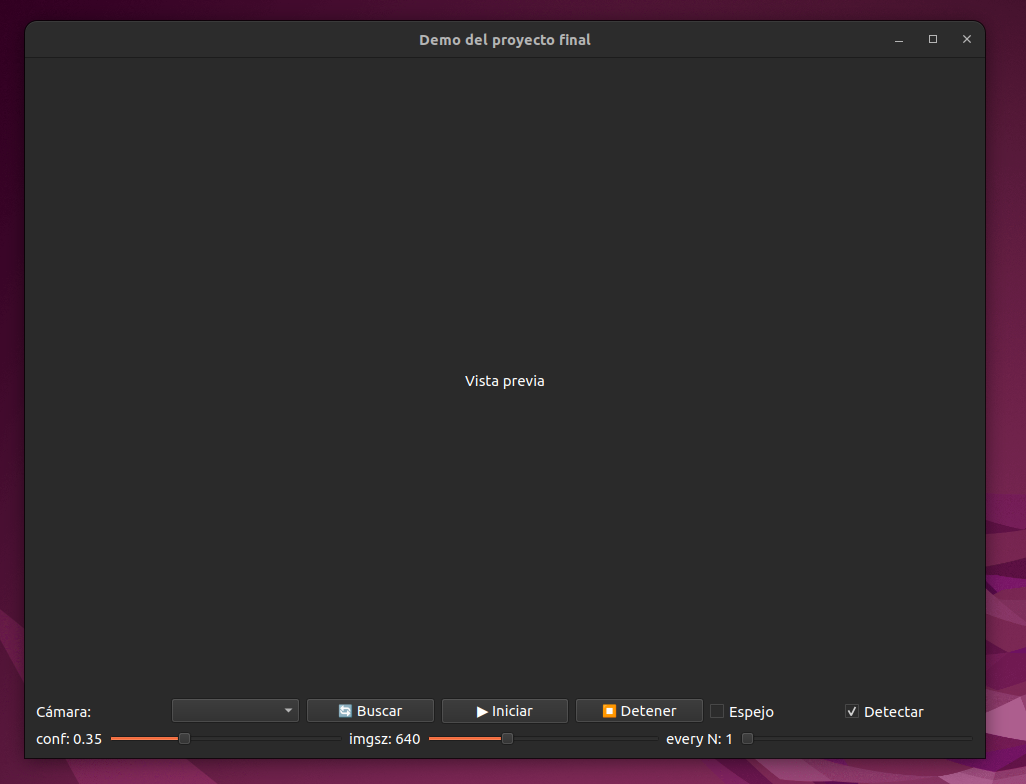

"Cascaron" del proyecto hecho con QT.

Qt funciona generando Widgets, es algo parecido a cuando usamos graficos con plt y vamos añadiendo partes que queremos ver una def init, por ejemplo los controles:

        # ---------- Controles ----------
        self.cameraBox = QtWidgets.QComboBox()
        self.refreshBtn = QtWidgets.QPushButton("🔄 Buscar") #va a buscar cámaras
        self.startBtn   = QtWidgets.QPushButton("▶ Iniciar")#va a iniciar el video
        self.stopBtn    = QtWidgets.QPushButton("⏹ Detener")#detiene el video
        self.flipChk    = QtWidgets.QCheckBox("Espejo")#hace que se vea contraior
        self.detectChk  = QtWidgets.QCheckBox("Detectar")
        self.detectChk.setChecked(True)

        self.confLbl = QtWidgets.QLabel("conf: 0.35")
        self.confSld = QtWidgets.QSlider(QtCore.Qt.Horizontal)
        self.confSld.setRange(10, 90); self.confSld.setValue(35)

        self.imgszLbl = QtWidgets.QLabel("imgsz: 640")
        self.imgszSld = QtWidgets.QSlider(QtCore.Qt.Horizontal)
        self.imgszSld.setRange(320, 1280); self.imgszSld.setSingleStep(32); self.imgszSld.setValue(640)

        self.everyLbl = QtWidgets.QLabel("every N: 1")
        self.everySld = QtWidgets.QSlider(QtCore.Qt.Horizontal)
        self.everySld.setRange(1, 5); self.everySld.setValue(1)


aquí uno de las opciones más importantes es el de conf, pues se va a tratar de una cifra que va a decidir si señalar el objeto o no, dependiendo si se alcanza el nivel.